# Dataset Column Descriptions

This dataset contains transaction and customer information, including purchase details and customer segmentation.

## **Transaction Details**
- **`DATE`** → The date when the transaction took place.  
- **`STORE_NBR`** → Store number where the purchase was made.  
- **`LYLTY_CARD_NBR`** → Unique loyalty card number assigned to a customer.  
- **`TXN_ID`** → Unique transaction ID representing a single purchase event.  
- **`PROD_NBR`** → Unique product number (ID) for the purchased item.  
- **`PROD_NAME`** → Name of the purchased product.  
- **`PROD_QTY`** → Quantity of the product purchased in the transaction.  
- **`TOT_SALES`** → Total amount spent on the transaction (price × quantity).  

## **Customer Segmentation**
- **`LIFESTAGE`** → Customer's life stage (e.g., Young Singles, Older Families).  
- **`PREMIUM_CUSTOMER`** → Customer segment based on spending habits (`Premium`, `Mainstream`, `Budget`).  

---

### **Usage Notes**
- Use `TXN_ID` to track individual purchases and analyze customer frequency.  
- `LYLTY_CARD_NBR` helps group transactions by customer for loyalty analysis.  
- `TOT_SALES` and `PROD_QTY` can be used to identify the most profitable products.  
- `LIFESTAGE` and `PREMIUM_CUSTOMER` are useful for targeted marketing strategies.  


### Exploring purchase_behaviour
- We see that both the dataset have Loyalty Card number (LYLTY_CARD_NBR) as a common columns , so we will compare both and create a singe dataset which we can use for our analysis.

In [ ]:
import pandas as pd 

In [ ]:
pb = pd.read_csv('purchase_behaviour.csv')
transaction = pd.read_csv('transaction_data.csv')

In [3]:
pb

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
pb.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [7]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
common_cards = set(pd.Series(pb['LYLTY_CARD_NBR']).unique()).intersection(set(pd.Series(transaction['LYLTY_CARD_NBR']).unique()))

In [9]:
only_in_purchase = set(pb["LYLTY_CARD_NBR"]) - set(transaction["LYLTY_CARD_NBR"])
only_in_transaction = set(transaction["LYLTY_CARD_NBR"]) - set(pb["LYLTY_CARD_NBR"])

In [10]:
only_in_purchase_count = len(only_in_purchase)
only_in_transaction_count = len(only_in_transaction)

In [11]:
print(f"Number of card numbers only in purchase data: {only_in_purchase_count}")
print(f"Number of card numbers only in transaction data: {only_in_transaction_count}")

Number of card numbers only in purchase data: 0
Number of card numbers only in transaction data: 0


In [12]:
data = transaction.merge(pb, on='LYLTY_CARD_NBR', how='left')

In [25]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [15]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Top 3 most profitable products 

- We Dont have any data regarding the price , so we'll just presume the total profit to be proportional to total sales

In [28]:
product_revenue = data.groupby("PROD_NAME")["TOT_SALES"].sum()
product_quantity = data.groupby("PROD_NAME")["PROD_QTY"].sum()

In [29]:
profitability = product_revenue / product_quantity

In [30]:
top_profitable_products = profitability.sort_values(ascending=False).head(3)

In [31]:
print("Top 3 Most Profitable Products:")
print(top_profitable_products)

Top 3 Most Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g            6.199416
Smiths Crnkle Chip  Orgnl Big Bag 380g      5.900000
Smiths Crinkle Chips Salt & Vinegar 330g    5.700000
dtype: float64


<b>Why did we explore the most profitable product first ? </b>  
- because we need to know what drives revenue before linking it back to who buys them.

## Lets analyze the customer 

We define a profiltable customer as those who:
- Spends the most (TOT_SALES per customer)
- Buy frequently (TXN_ID counts per cutomer)
- Prefer high-margin(premium) products

In [35]:
customer_segments = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
customer_segments = customer_segments.sort_values(by="TOT_SALES", ascending=False)

In [37]:
print("Top Customer Segments by Total Sales:")
print(customer_segments)

Top Customer Segments by Total Sales:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  168363.25
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60
13                RETIREES       Mainstream  155677.05
15          YOUNG FAMILIES           Budget  139345.85
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
7           OLDER FAMILIES       Mainstream  103445.55
14                RETIREES          Premium   97646.05
16          YOUNG FAMILIES       Mainstream   92788.75
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
17          YOUNG FAMILIES          Premium   84025.50
8           OLDER FAMILIES          Premium   81958.40
18   YOUNG SINGLES/COUPLES           Budget   61141.60
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
20   YOUNG SINGLES/COUPLES 

# Most Loyal Customers

In [39]:
loyal_customers = data.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()
loyal_customers = loyal_customers.sort_values(by="TXN_ID", ascending=False)
high_spending_customers = data.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
high_spending_customers = high_spending_customers.sort_values(by="TOT_SALES", ascending=False)
loyal_high_spenders = loyal_customers.merge(high_spending_customers, on="LYLTY_CARD_NBR")

In [42]:
print("Top Loyal & High-Spending Customers:")
print(loyal_high_spenders.head(10))


Top Loyal & High-Spending Customers:
   LYLTY_CARD_NBR  TXN_ID  TOT_SALES
0          162039      18      126.8
1          172032      18      120.1
2           13138      17      109.0
3          116181      17      117.6
4          128178      17       99.7
5          230078      17      138.6
6          105026      16      114.2
7          129050      16       93.5
8          109036      16      113.0
9          222242      16      109.2


# Hypothesis on why these customer are loyal

- <b> If older families spend the most</b> -> they may prefer bulk-shopping and family sized packs.
- <b> If young singles are top buying</b> -> they may prefer small , trendy , on-the-go products
- <b> If premium customers dominate sales </b> -> They might be brand-conscious and less price-sensitive
- <b> If budget customers buy frequently </b> → They may be discount-driven, needing price promotions.

# The graph below shows which customer types are most valuable for marketing focus.

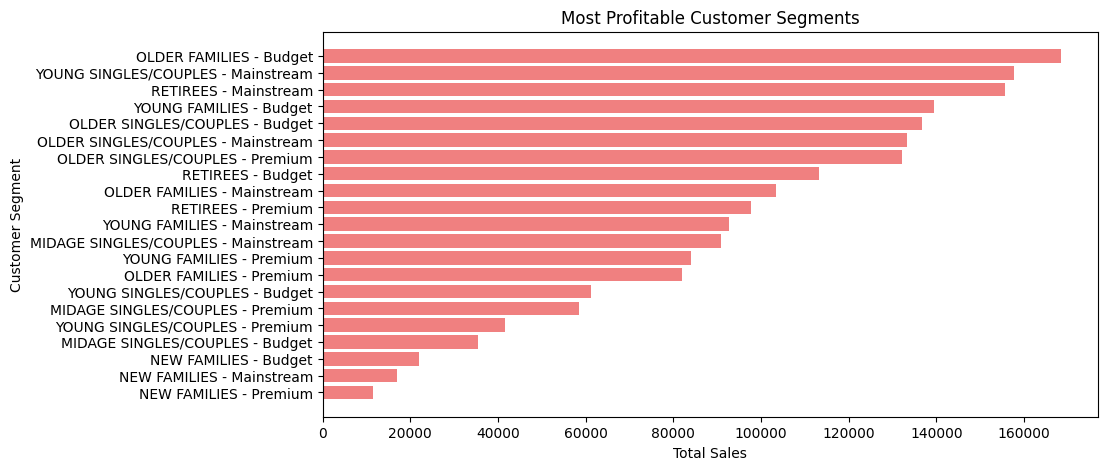

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(customer_segments["LIFESTAGE"] + " - " + customer_segments["PREMIUM_CUSTOMER"], 
         customer_segments["TOT_SALES"], color="lightcoral")

plt.xlabel("Total Sales")
plt.ylabel("Customer Segment")
plt.title("Most Profitable Customer Segments")
plt.gca().invert_yaxis()
plt.show()


# Final Deliverables to the marketing team


- **Top 3 BestSeling products**:
    - Dorito Corn Chp     Supreme 380g         
    - Smiths Crnkle Chip  Orgnl Big Bag 380g     
    - Smiths Crinkle Chips Salt & Vinegar 330g   

- **Most Profitable customer segments**: 
    - Older Familis (Budget)
        - Likely purchase in bulk for family needs.
        - **Marketing Strategy**: Offer family-size packs, bulk discounts, and loyalty rewards
    - Young singles/ Couples (mainstream)
        - May prefer snacking, convenience, and trendy products.
        - **Marketing Strategy**: Target them with smaller pack sizes, premium snack options, and online promotions.
    - Retirees (Mainstream/budget)
        - Likely loyal to brands & consistent buyers.
        - **Marketing Strategy**: Offer membership discounts, bundle deals, and promotions for frequently purchased items.
    - Young Families (Budget & Mainstream):
        - Need cost-effective options for a growing family
        - Marketing Strategy: Promote family-friendly multipacks & budget-friendly deals.
    - Premium Customers 
        - They buy high-quality products but in lower volumes.
        - **Marketing Strategy**: Introduce luxury, healthier, and exclusive product lines.


- **Loyal customer traits:**
    - **If older families spend the most** -> They may prefer bulk-shopping and family-sized packs.
    - **If young singles are top buyers** -> They may prefer small, trendy, on-the-go products.
    - **If premium customers dominate sales** -> They might be brand-conscious and less price-sensitive.
    - **If budget customers buy frequently** -> They may be discount-driven, needing price promotions.